<a href="https://colab.research.google.com/github/Ivan8Garcia/data-science/blob/main/optimizacion_aeroportuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CLASE 1**

In [1]:
import pandas as pd



In [2]:
datos= pd.read_csv("/content/flights.csv")
datos.shape

(71175, 11)

In [3]:
#estos son los metadatos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [4]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [5]:
# en delay tenemos en la primer fila un retraso de 70 minutos y multiplicamos .20*60 segundos y el resultado son 12seg. asi que tenemos 70min con 12seg
round(.20*60)

12

In [6]:
#igual para arrival_time tenemos 8.885,es la hora de llegada y multiplicamos (60*0.88=53)y tenemos que la hora de llegada es a las 8:53min
round(.885*60)

53

In [7]:
#variables numericas
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [8]:
#variables categoricas
datos.describe(include="O")

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt



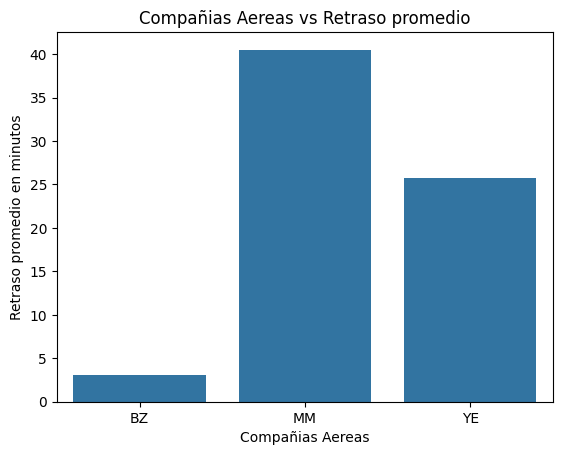

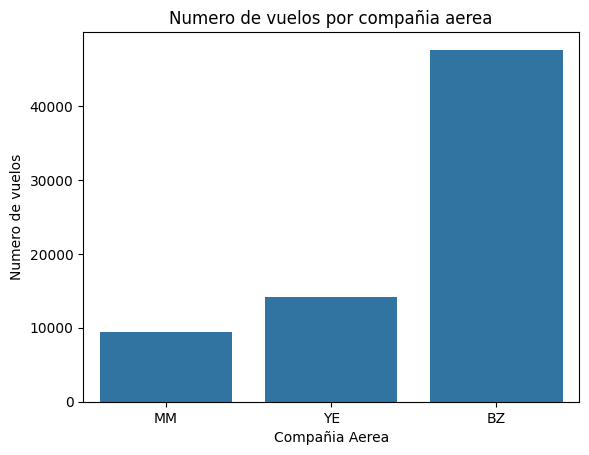

In [10]:
avg_delay= datos.groupby("airline")["delay"].mean().reset_index()
sns.barplot(x="airline",y="delay",data=avg_delay)
plt.title("Compañias Aereas vs Retraso promedio")
plt.xlabel("Compañias Aereas")
plt.ylabel("Retraso promedio en minutos")
plt.show()

sns.countplot(data=datos,x="airline")
plt.title("Numero de vuelos por compañia aerea")
plt.xlabel("Compañia Aerea")
plt.ylabel("Numero de vuelos")
plt.show()

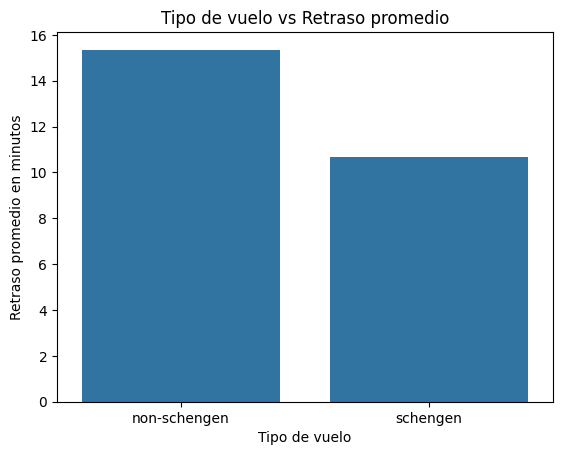

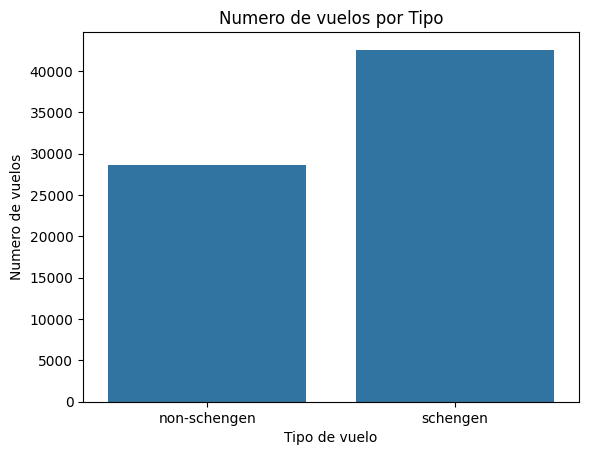

In [11]:
avg_delay= datos.groupby("schengen")["delay"].mean().reset_index()
sns.barplot(x="schengen",y="delay",data=avg_delay)
plt.title("Tipo de vuelo vs Retraso promedio")
plt.xlabel("Tipo de vuelo")
plt.ylabel("Retraso promedio en minutos")
plt.show()

sns.countplot(data=datos,x="schengen")
plt.title("Numero de vuelos por Tipo")
plt.xlabel("Tipo de vuelo")
plt.ylabel("Numero de vuelos")
plt.show()

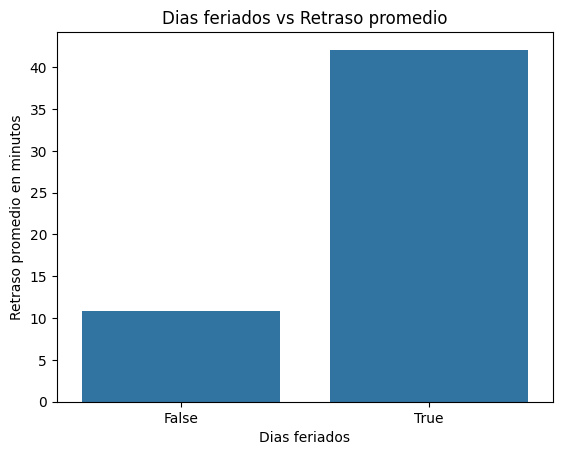

In [12]:
avg_delay= datos.groupby("is_holiday")["delay"].mean().reset_index()
sns.barplot(x="is_holiday",y="delay",data=avg_delay)
plt.title("Dias feriados vs Retraso promedio")
plt.xlabel("Dias feriados")
plt.ylabel("Retraso promedio en minutos")
plt.show()

In [13]:
datos["aircraft_type"].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

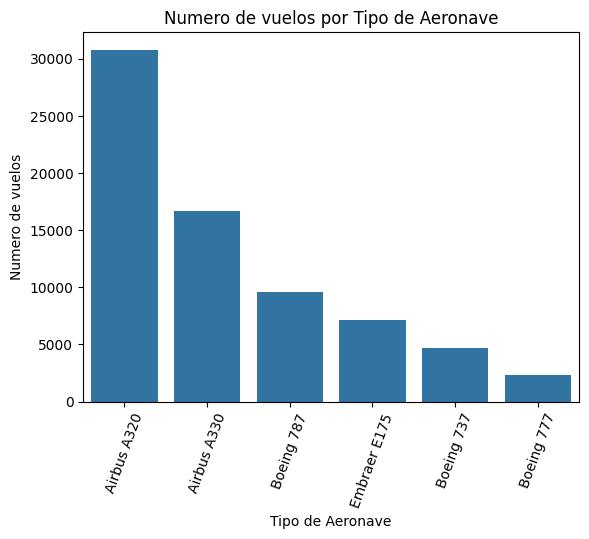

In [14]:
order=datos["aircraft_type"].value_counts().index
sns.countplot(data=datos,x="aircraft_type",order=order)
plt.title("Numero de vuelos por Tipo de Aeronave")
plt.xticks(rotation=70)
plt.xlabel("Tipo de Aeronave")
plt.ylabel("Numero de vuelos")
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

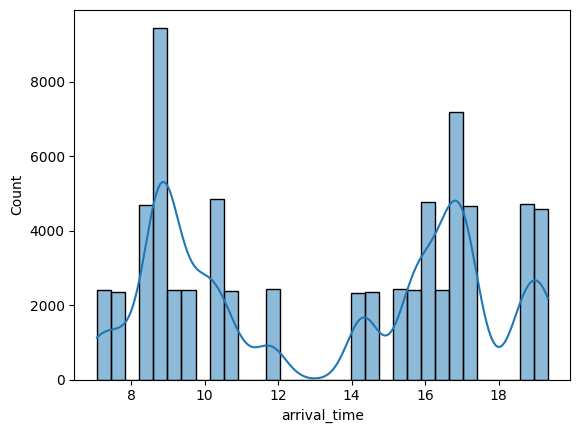

In [15]:
sns.histplot(data=datos,x="arrival_time",kde=True)

In [16]:
import numpy as np

def ancho_bin(df,columna):
  q75,q25= np.percentile(df[columna],[75,25])
  iqr=q75-q25
  ancho=2* iqr* np.power(len(df[columna]),-1/3)
  return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

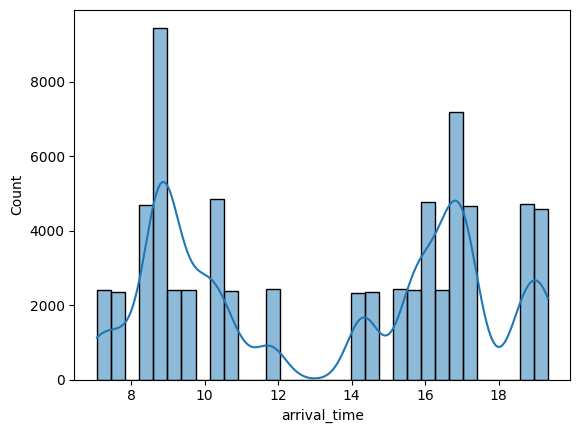

In [17]:
binwidth= ancho_bin(datos,"arrival_time")
sns.histplot(data=datos,x="arrival_time",kde=True,binwidth=binwidth)

<Axes: xlabel='departure_time', ylabel='Count'>

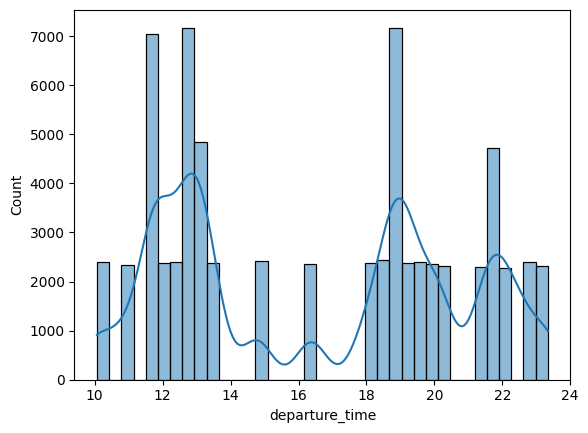

In [18]:
binwidth= ancho_bin(datos,"departure_time")
sns.histplot(data=datos,x="departure_time",kde=True,binwidth=binwidth)

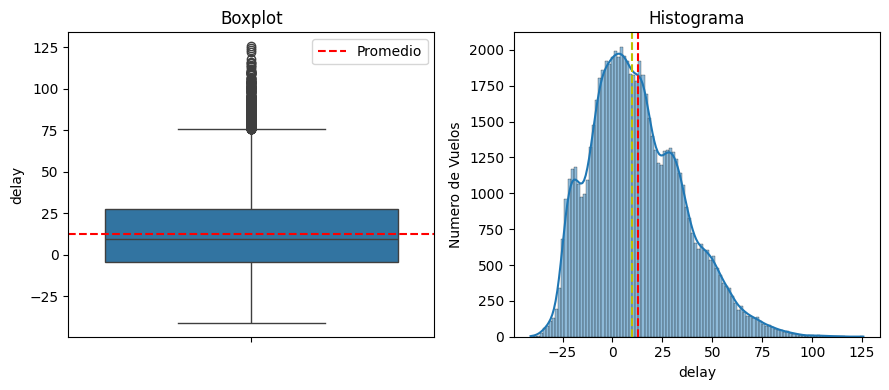

In [19]:
atraso_promedio= datos.delay.mean()
atraso_mediana= datos.delay.median()

#fig=lienzo,ax= ejes(x,y).. subplots(1,2 significa que hay 2 graficas a lado)
fig,ax= plt.subplots(1,2,figsize=(9,4))

#ax=ax[0]significa que es el grafico ubicado a la izquierda
sns.boxplot(data=datos,y="delay",ax=ax[0])
ax[0].set_title("Boxplot")
ax[0].axhline(y=atraso_promedio,color="r",linestyle="--",label="Promedio")
ax[0].legend()

binwidth=ancho_bin(datos,"delay")
sns.histplot(data=datos,x="delay",ax=ax[1],kde=True,binwidth=binwidth)
plt.ylabel("Numero de Vuelos")
plt.grid(False)
ax[1].set_title("Histograma")
ax[1].axvline(x=atraso_promedio,color="r",linestyle="--",label="Promedio")
ax[1].axvline(x=atraso_mediana,color="y",linestyle="--",label="Mediana")
ax[1].legend

plt.tight_layout() #este sirve para que las graficas esten juntitas

plt.show()

#**CLASE 2**

In [20]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [21]:
#creamos una nueva columna llamada date. y convertimos las columnas "year" y "day" a str para concatenarlas ya que anteriormente
# eran int(enteros), y usamos el +1 porque el dia 0 nos lo marca como error, asi que se le tiene que sumar 1
datos["date"]=datos["year"].astype(str)+"-"+(datos["day"]+1).astype(str)
datos["date"]=pd.to_datetime(datos["date"],format= "%Y-%j") #la j es para convertir el dia 1 en 1ero-enero hasta el dia 364 en 31-dic
datos.head(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01


In [22]:
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [23]:
#creando una nueva columna para saber si es fin de semana, recordando que el lunes comienza como 0
datos["is_weekend"]=datos["date"].dt.weekday.isin([5,6])
datos["day_name"]=datos["date"].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
50214,8,BZ,Airbus A320,schengen,ZQO,15.729617,18.729617,62,2019,False,26.122857,2019-03-04,False,Monday
62198,18,BZ,Airbus A320,schengen,TZF,14.258911,20.258911,131,2021,False,-6.872096,2021-05-12,False,Wednesday
36318,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,231,2016,False,43.266638,2016-08-19,False,Friday
27757,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,25,2015,False,1.234991,2015-01-26,False,Monday
54927,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,11,2020,False,-15.759599,2020-01-12,True,Sunday


In [24]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
#ahora reemplazaremos datos en la columnas que aparecen como booleanos y en schengen
datos["schengen"]=datos["schengen"].replace({"non-schengen":0, "schengen":1})
datos["is_holiday"]=datos["is_holiday"].replace({False:0,True:1})
datos["is_weekend"]=datos["is_weekend"].replace({False:0,True:1})

datos.head(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday


In [27]:
#Todas estas columnas son categoricas (OBJ), para que se puedan hacer buenos modelos hay que codificarlas
categoricas= ["airline","aircraft_type","origin","day_name"]

pd.get_dummies(data=datos,columns=categoricas,dtype=int).head(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [28]:
#get_dummies es para codificar
datos_codificados=pd.get_dummies(data=datos,columns=categoricas,dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
21571,12,1,17.313731,21.313731,343,2013,0,60.728976,2013-12-10,0,...,0,1,0,0,0,0,0,0,1,0
7990,24,1,9.668655,12.668655,167,2011,0,31.195708,2011-06-17,0,...,0,0,0,1,0,0,0,0,0,0
7560,2,1,19.196804,22.196804,139,2011,0,39.902785,2011-05-20,0,...,0,0,1,1,0,0,0,0,0,0
32808,20,1,16.909690,18.909690,362,2015,0,8.085321,2015-12-29,0,...,0,0,0,0,0,0,0,0,1,0
51120,9,0,10.733469,12.733469,123,2019,0,-26.681630,2019-05-04,1,...,0,1,0,0,0,1,0,0,0,0


In [29]:
#usaremos el metodo de las correlaciones porque en las graficas cuando usamos kde,las kde se parecen mucho
#para ello usaremos el metodo de correlaciones para comprobar matematicamente cuanto se parecen
#aqui veremos la correlacion entre el horario de llega y de salida
datos[["arrival_time","departure_time"]].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [30]:
#si se utiliza los dos datos de la celda superior podemos sesgar el modelo, asi que solo debemos usar 1 de ellas
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [31]:
df=datos_codificados.drop(columns=["flight_id","departure_time","day","year","date"])
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
3241,1,19.196804,0,18.550105,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
6117,1,8.564949,0,45.642767,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
10773,1,14.376052,0,-16.814071,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
70265,0,10.177197,0,-4.968235,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
40982,1,9.668655,1,37.390188,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
18135,0,15.967963,0,-14.197898,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
35464,1,8.591208,0,10.114506,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
24340,1,18.635384,0,-34.420906,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
37732,1,18.801235,0,2.248048,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
64588,1,8.923441,0,-3.805764,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


##**Manos a la obra: ¿cómo utilizar el OneHotEncoder de Sklearn?**
Existen algunas formas de realizar la codificación dummy de las variables que son categóricas. Dos de ellas son usando el método get_dummies de la biblioteca Pandas y el OneHotEncoder de la biblioteca sklearn. Durante el curso, optamos por el primer enfoque. Según el código a continuación:

Aplica la codificación dummy en el código de la clase utilizando el OneHotEncoder de Scikit-Learn
en lugar del get_dummies de la biblioteca pandas.

In [32]:
#categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']
#df_codificado = pd.get_dummies(df, columns=categorical_vars, dtype=int)
#df_codificado.head()

#Aplica la codificación dummy en el código de la clase utilizando el OneHotEncoder de Scikit-Learn
#en lugar del get_dummies de la biblioteca pandas.

Para utilizar el OneHotEncoder en lugar del get_dummies de la biblioteca Pandas podemos hacerlo de la siguiente manera:

In [33]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categoricas = ['airline','aircraft_type','origin','day_name']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    categoricas),
    remainder='passthrough')

datos = one_hot_enc.fit_transform(datos)
datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())
datos

,onehotencoder__airline_BZ,onehotencoder__airline_MM,onehotencoder__airline_YE,onehotencoder__aircraft_type_Airbus A320,onehotencoder__aircraft_type_Airbus A330,onehotencoder__aircraft_type_Boeing 737,onehotencoder__aircraft_type_Boeing 777,onehotencoder__aircraft_type_Boeing 787,onehotencoder__aircraft_type_Embraer E175,onehotencoder__origin_AUZ,...,remainder__flight_id,remainder__schengen,remainder__arrival_time,remainder__departure_time,remainder__day,remainder__year,remainder__is_holiday,remainder__delay,remainder__date,remainder__is_weekend
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,1,18.635384,22.635384,364,2022,1,25.677277,2022-12-31,1
71171,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,17,0,16.718722,21.718722,364,2022,1,52.624348,2022-12-31,1
71172,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,7,1,8.564949,13.564949,364,2022,1,56.16708,2022-12-31,1
71173,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,9.344097,12.344097,364,2022,1,56.758844,2022-12-31,1


**Analizando el código anterior paso a paso:**

**1 - from sklearn.compose import make_column_transformer**

Este es un import del método make_column_transformer de la biblioteca sklearn.compose. Este método se usa para aplicar transformaciones específicas a columnas específicas de un DataFrame.

**2 - from sklearn.preprocessing import OneHotEncoder**

Este es un import del OneHotEncoder de la biblioteca sklearn.preprocessing. Este es el método que realmente realiza la codificación one-hot.

**3 - categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']**

Aquí, estamos definiendo una lista de nombres de columnas que queremos transformar usando la codificación one-hot, que son las mismas definidas utilizando el get_dummies.

**4 - one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), categoricas), remainder='passthrough')**

Aquí, estamos creando un ColumnTransformer que aplica el OneHotEncoder a las columnas especificadas en categoricas. El argumento handle_unknown='ignore' significa que el OneHotEncoder ignorará cualquier categoría desconocida que pueda aparecer durante la transformación. El argumento remainder='passthrough' significa que cualquier columna que no esté especificada para la transformación será pasada a través sin cambios.

**5 - datos = one_hot_enc.fit_transform(datos)**

Aquí, estamos aplicando la transformación al DataFrame datos. El método fit_transform ajusta el transformador a los datos y luego transforma los datos.

**6 - datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())**

Aquí, estamos convirtiendo los datos transformados de nuevo a un DataFrame. También estamos definiendo los nombres de las columnas para que sean los nombres de características de salida del ColumnTransformer.

#**CLASE 3**

In [34]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [35]:
#primero separamos nuestras columnas para tener las columnas de prueba y entrenamiento
X= df.drop(["delay"],axis=1)
y=df["delay"]

#segundo,empezaremos a segmentar nuestras X_train,etc...
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

baseline=DummyRegressor()
baseline.fit(X_train,y_train)



DummyRegressor()

In [36]:
#ahora vamos a evaluar el modelo usando metricas
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

y_pred_dummy=baseline.predict(X_test)

def calcular_regresion (y_test,y_pred):
  rmse=mean_squared_error(y_test,y_pred)
  mae=mean_absolute_error(y_test,y_pred)
  r2= r2_score(y_test,y_pred)
  metricas={
      "RMSE":round(rmse**(1/2),4),
      "MAE":round(mae,4),
      "R2":round(r2,4)
  }
  return metricas

In [41]:
#los resultados son en minutos; aqui vemos que el modelo generalizó de una manera no tan buena
#RMSE= 23min, MAE=18min.
resultados_baseline=calcular_regresion(y_test,y_pred_dummy)
resultados_baseline

{'RMSE': 23.3079, 'MAE': 18.4449, 'R2': -0.0127}

### **Manos a la obra: otras estrategias para el DummyRegressor**

Como se indica en la documentación, observamos que hay varias enfoques disponibles para implementar el DummyRegressor a través del parámetro 'strategy'. Durante el curso, optamos por la estrategia 'mean (media)', en la cual la salida corresponde a la media del conjunto de datos utilizado para el entrenamiento. Sin embargo, hasta el momento, no hemos explorado las demás estrategias disponibles.

Respuesta:

Para evaluar los modelos necesitamos utilizar algunas métricas, por lo tanto, vamos a utilizar la función definida durante el curso:

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_metricas_regresion(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'Raíz del Error Cuadrático Medio': round(rmse, 4),
        'Error Absoluto Medio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas

Para calcular las métricas de acuerdo con las diferentes estrategias, un ejemplo de código se describe a continuación:

In [39]:
from sklearn.dummy import DummyRegressor

estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(X_train, y_train)

    y_pred_dummy = model_dummy.predict(X_test)

    metricas = calcular_metricas_regresion(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estrategia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")

Estrategia: mean
Raíz del Error Cuadrático Medio: 536.4395
Error Absoluto Medio: 18.5646
R2 Score: -0.0


Estrategia: median
Raíz del Error Cuadrático Medio: 544.9711
Error Absoluto Medio: 18.4452
R2 Score: -0.0159


Estrategia: quantile
Raíz del Error Cuadrático Medio: 826.8758
Error Absoluto Medio: 22.0248
R2 Score: -0.5414


Estrategia: constant
Raíz del Error Cuadrático Medio: 543.2565
Error Absoluto Medio: 18.4449
R2 Score: -0.0127




El **DummyRegressor** es una clase de scikit-learn que permite la creación de un modelo simple de referencia (o baseline) para comparación con modelos más complejos. Este modelo no toma en cuenta los datos de entrada y hace predicciones basadas en una estrategia simple especificada.

Las estrategias utilizadas en este código son: "mean", "median", ("quantile", 0.25), ("constant", 10.0). Cada una de estas estrategias define cómo el DummyRegressor hace sus predicciones:

**"mean":** predice la media de los valores de entrenamiento.

**"median":** predice la mediana de los valores de entrenamiento.

**"quantile":** predice un cuantil específico de los valores de entrenamiento. En el caso de este código, se utiliza el cuantil 0.25.

**"constant":** predice un valor constante especificado. En el caso de este código, se utiliza el valor 10.0.

El código recorre cada una de estas estrategias en un bucle, entrenando un DummyRegressor con la estrategia correspondiente y evaluando su desempeño utilizando un conjunto de métricas de regresión. Las métricas son calculadas por la función calcular_metricas_regresion.

Los resultados se almacenan en un diccionario, donde la clave es la estrategia utilizada y el valor es otro diccionario que contiene las métricas calculadas. Por último, el código imprime los resultados para cada estrategia.

##**RandomForest**

In [42]:
#los resultados son en minutos; aqui vemos que el modelo generalizó mejor
#RMSE= 13min, MAE=11min.
from sklearn.ensemble import RandomForestRegressor

modelo= RandomForestRegressor(max_depth=5,random_state=42)
modelo.fit(X_train,y_train)
y_pred=modelo.predict(X_test)
resultados_rf= calcular_regresion(y_test,y_pred)
resultados_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

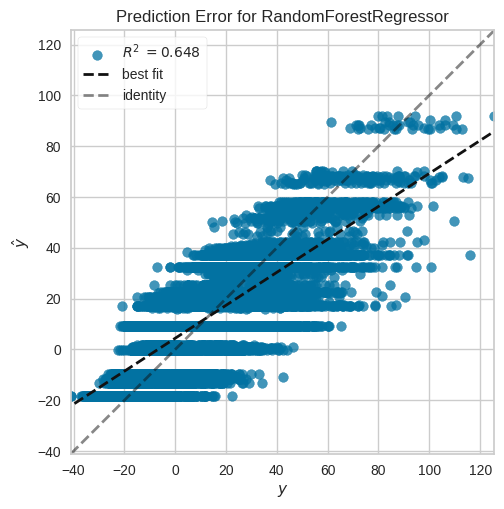

In [43]:
from yellowbrick.regressor import prediction_error

Visualizer= prediction_error(modelo,X_train,y_train,X_test,y_test);

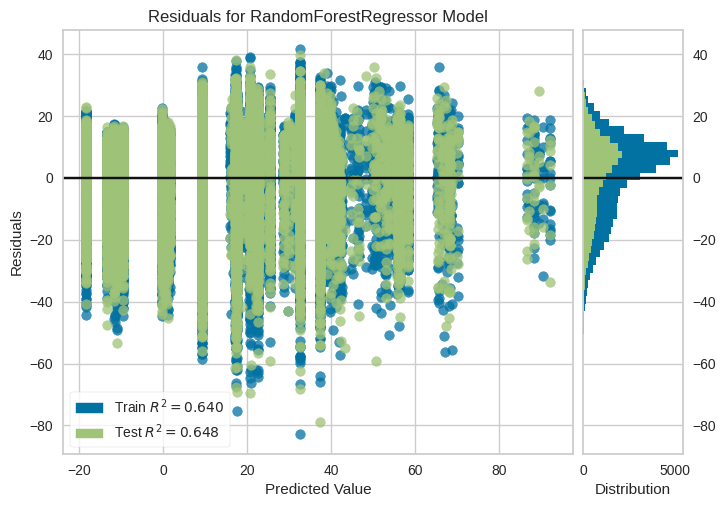

In [44]:
from yellowbrick.regressor import residuals_plot

viz= residuals_plot(modelo,X_train,y_train,X_test,y_test);

##**Cross Validation**

In [45]:
from sklearn.model_selection import KFold,cross_validate

scoring={
    "RMSE":"neg_root_mean_squared_error",
    "MAE": "neg_mean_absolute_error",
    "R2": "r2"
}
cv= KFold(n_splits=5,shuffle=True,random_state=42)
cv_resultados= cross_validate(modelo,X_train,y_train,scoring=scoring,cv=cv)
cv_resultados

{'fit_time': array([3.09017348, 3.51851344, 3.40656614, 2.95287395, 2.98636198]),
 'score_time': array([0.05400467, 0.07159615, 0.05336189, 0.06522131, 0.05398226]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

#**CLASE 4**


En estos primeros pasos estamos viendo la importancia de las columnas,para ello veremos cuantas  columnas tenemos (31) y cuales son las de mayor importancia

In [46]:
len(df.columns)

31

In [49]:
modelo.feature_importances_

array([2.02297728e-06, 4.13007807e-02, 1.45895991e-01, 6.10861947e-05,
       5.30319673e-01, 1.26075383e-05, 2.30497695e-05, 1.00745507e-01,
       5.76179123e-02, 5.18974843e-04, 1.20884119e-04, 2.55889854e-02,
       4.58691397e-02, 1.01922847e-04, 1.67363452e-04, 1.26370494e-02,
       4.47679992e-05, 1.13027619e-04, 1.02152091e-03, 6.77367856e-03,
       2.17371082e-02, 7.80891854e-03, 2.18739739e-04, 8.68597522e-04,
       1.00052465e-04, 2.79146627e-05, 7.17673254e-05, 3.72705034e-05,
       1.06499638e-04, 8.71862374e-05])

In [50]:
importances= modelo.feature_importances_

In [52]:
feature_importances=pd.DataFrame({"Features":X.columns,"Importances":(importances*100).round(2)}).sort_values("Importances",ascending=False)
feature_importances

,Features,Importances
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,4.13
11,aircraft_type_Boeing 787,2.56
20,origin_TCY,2.17
15,origin_CSF,1.26
21,origin_TZF,0.78


In [56]:
#ejemplo para ver como se comporta la list comprehension de la celda anterior
[i if i !=0 else 1 for i in range(0,35,5)]

[1, 5, 10, 15, 20, 25, 30]

In [57]:
resultados=pd.DataFrame(index=["RMSE","MAE","R2"])
model_features=RandomForestRegressor(max_depth=5,random_state=42)
ct_features= [i if i !=0 else 1 for i in range(0,35,5)]

for i in ct_features:
  selected_features= feature_importances["Features"].values[:i]
  X_train_sel= X_train[selected_features]
  X_test_sel= X_test[selected_features]
  model_features.fit(X_train_sel,y_train)
  y_pred=model_features.predict(X_test_sel)
  metricas=calcular_regresion(y_test,y_pred)
  resultados[i]= list(metricas.values())

resultados



,1,5,10,15,20,25,30
RMSE,18.8331,15.1564,13.7564,13.7497,13.7498,13.7477,13.7479
MAE,14.9620,12.0605,11.0425,11.0285,11.0280,11.0261,11.0262
R2,0.3388,0.5718,0.6472,0.6476,0.6476,0.6477,0.6477


lo que podemos apreciar es que del feature 10 al 15 son los mejores tiempos de ejecucion,osea que tarda menos, en la siguiente celda seleccionaremos solamente del 10 al 15 para ver su comportamiento mas de cerca.

In [55]:
resultados=pd.DataFrame(index=["RMSE","MAE","R2"])
model_features=RandomForestRegressor(max_depth=5,random_state=42)
ct_features=  range(10,16)

for i in ct_features:
  selected_features= feature_importances["Features"].values[:i]
  X_train_sel= X_train[selected_features]
  X_test_sel= X_test[selected_features]
  model_features.fit(X_train_sel,y_train)
  y_pred=model_features.predict(X_test_sel)
  metricas=calcular_regresion(y_test,y_pred)
  resultados[i]= list(metricas.values())

resultados

,10,11,12,13,14,15
RMSE,13.7564,13.7564,13.7564,13.7526,13.7497,13.7497
MAE,11.0425,11.0425,11.0428,11.0314,11.0285,11.0285
R2,0.6472,0.6472,0.6472,0.6474,0.6476,0.6476


In [58]:
  selected_features= feature_importances["Features"].values[:13]
  X_selected_features= X[selected_features]
  X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_TZF,origin_PUA,origin_MWL,day_name_Friday
0,0,0,1,0,0,8.885071,0,1,0,0,0,0,1
1,0,0,1,0,0,8.939996,0,1,0,0,0,0,1
2,1,0,0,0,1,18.635384,0,0,0,1,0,0,1
3,1,0,0,1,0,15.967963,0,0,0,0,0,0,1
4,1,0,0,1,0,16.571894,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,1,0,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,1,0,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


In [60]:
X_train,X_test,y_train,y_test= train_test_split(X_selected_features,y,random_state=42)

In [61]:
param_grid= {
    "max_depth":[5,10,15],
    "min_samples_leaf":[1,2,3],
    "min_samples_split":[2,4,6],
    "n_estimators":[100,150,200]
}

In [62]:
from sklearn.model_selection import GridSearchCV

cv= KFold(n_splits=5,shuffle=True,random_state=42)
model_grid= GridSearchCV(RandomForestRegressor(random_state=42),
                         param_grid=param_grid,scoring="r2",
                         cv=cv)

model_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [63]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [64]:
y_pred_grid=model_grid.predict(X_test)
metricas_model_grid=calcular_regresion(y_test,y_pred_grid)
metricas_model_grid

{'RMSE': 13.2308, 'MAE': 10.6296, 'R2': 0.6754}

In [65]:
resultados["modelo_grid"]= list(metricas_model_grid.values())
resultados

,1,5,10,15,20,25,30,modelo_grid
RMSE,18.8331,15.1564,13.7564,13.7497,13.7498,13.7477,13.7479,13.2308
MAE,14.9620,12.0605,11.0425,11.0285,11.0280,11.0261,11.0262,10.6296
R2,0.3388,0.5718,0.6472,0.6476,0.6476,0.6477,0.6477,0.6754


lo que podemos leer de la celda anterior es que en la nueva columna llamada "modelo_grid, se muestran las mejoras de tiempo que tuvo el modelo, y matematicamente vemos que los resultados en **RMSE** son 13.23 min que es menor que 13.74min;En **MAE** 10.62 tambien es mejor que 11.02 y por ultimo tenemos que en **R2** tenemos una mejor de 67.5% y antes era de 64.7%

### **Cantidad de combinaciones**

Al usar **GridSearchCV** para optimizar hiperparámetros, es fundamental entender cuántas veces se entrena y evalúa el algoritmo para determinar la complejidad computacional y el tiempo necesario para la búsqueda de hiperparámetros. En el código a continuación, analiza cuántas veces se entrena y evalúa el algoritmo:

from sklearn.model_selection import GridSearchCV

param_grid = {

 'max_depth': [5, 10, 15],

 'min_samples_leaf': [1, 2, 3],

 'min_samples_split': [2, 4, 6],

 'n_estimators': [100, 150, 200]

 }

model_grid = GridSearchCV(RandomForestRegressor(random_state=42),

param_grid=param_grid, cv=3, scoring='r2')

model_grid.fit(X_train, y_train)



Para calcular cuántas veces se entrena y evalúa el algoritmo, multiplicamos el número de combinaciones únicas de hiperparámetros
por el número de pliegues en la validación cruzada. Hay 3 opciones para 'max_depth', 3 para 'min_samples_leaf',
3 para 'min_samples_split' y 3 para 'n_estimators'. Por lo tanto, el número total de combinaciones únicas de hiperparámetros
es 3 * 3 * 3 * 3 = 81. Como estamos usando validación cruzada de 3 pliegues, cada conjunto de hiperparámetros será entrenado y evaluado 3 veces.
Por lo tanto, el algoritmo será entrenado y evaluado 81 * 3 = **243 veces en total.**

In [66]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {
 #'max_depth': [5, 10, 15],
 #'min_samples_leaf': [1, 2, 3],
 #'min_samples_split': [2, 4, 6],
 #'n_estimators': [100, 150, 200]
 #}

#model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='r2')
#model_grid.fit(X_train, y_train)



### **GLOSARIO DE HIPERPARAMETROS**



El RandomForestRegressor es un modelo de conjunto que combina varios árboles de decisión para hacer predicciones más robustas y precisas a través de la técnica de Bagging.

Los hiperparámetros son configuraciones que puedes ajustar para controlar el comportamiento del RandomForestRegressor. A continuación, se presenta una lista de los principales hiperparámetros:

**1 - n_estimators:**

Este hiperparámetro especifica el número de árboles de decisión que se crearán en el bosque aleatorio. Cuanto mayor sea el número de estimadores, mayor será la capacidad del modelo para ajustarse a los datos. Sin embargo, un número muy alto puede llevar a un aumento en el tiempo de entrenamiento.

**2 - criterion:**

El hiperparámetro criterion determina la función de medición de la calidad de una división durante la construcción de los árboles. Para regresión, el valor predeterminado es "mse" (Error Cuadrático Medio), que calcula la media de los cuadrados de los errores. Otra opción es "mae" (Error Absoluto Medio), que utiliza la media de los valores absolutos de los errores.

**3 - max_depth:**

Este hiperparámetro controla la profundidad máxima de los árboles de decisión en el bosque. Limitar la profundidad puede ayudar a evitar el sobreajuste, ya que impide que los árboles se ajusten demasiado a los datos de entrenamiento y no puedan hacer buenas predicciones para nuevos datos.

**4 - min_samples_split:**

El min_samples_split determina el número mínimo de muestras necesarias para dividir un nodo interno del árbol. Esto ayuda a controlar el crecimiento de los árboles y evita divisiones que llevan a nodos con pocas muestras.

**5 - min_samples_leaf:**

Este hiperparámetro define el número mínimo de muestras requeridas en una hoja (nodo terminal) del árbol. Esto ayuda a controlar la granularidad del árbol y puede impedir que las hojas contengan muy pocas muestras.

**6 - max_features:**

max_features especifica el número máximo de características a considerar al buscar la mejor división en cada nodo. Los valores comunes incluyen "auto" (sqrt(n_features)), "sqrt" (también sqrt(n_features)), "log2" (log2(n_features)), o un número entero que representa la cantidad exacta de características a considerar.

**7 - random_state:**

Este hiperparámetro define una semilla para el generador de números aleatorios utilizado para crear el bosque aleatorio. Definir un valor fijo para random_state garantiza que el modelo sea reproducible.

**8 - n_jobs:**

n_jobs especifica el número de núcleos de CPU a utilizar para el entrenamiento en paralelo. Si se define como -1, se utilizarán todos los núcleos disponibles.
Estos son algunos de los principales hiperparámetros del RandomForestRegressor en scikit-learn. La elección adecuada de estos hiperparámetros puede afectar significativamente el rendimiento y la capacidad de generalización del modelo para tareas de regresión. Para consultar los otros hiperparámetros faltantes, puedes consultar la documentación oficial de scikit-learn.

##**PICKLE**

In [67]:
import pickle

try:
  with open("champion.pkl","wb") as file:
    pickle.dump(model_grid.best_estimator_,file)
  print("Modelo serializado con exito")
except Exception as e:
  print("Se presentó un error al almacenar el modelo:", str(e))




Modelo serializado con exito


### ** Manos a la obra: utilizando el modelo guardado**

Concluimos el proceso de desarrollo, optimización y guardado del modelo. Sin embargo, surge la cuestión de cómo utilizar efectivamente este modelo en situaciones prácticas. ¿Cómo podemos aprovechar el modelo que fue guardado para realizar predicciones actualizadas?

Ante esto, construye un código que cargue el modelo guardado y realice la predicción para la siguiente muestra:

In [68]:
nueva_muestra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Donde los valores corresponden a :

schengen: 0

arrival_time: 10.8941

is_holiday: 0

is_weekend: 0

airline_BZ: 0

airline_MM: 0

airline_YE: 1

aircraft_type_Airbus A320: 1

aircraft_type_Airbus A330: 0

aircraft_type_Boeing 737: 0

aircraft_type_Boeing 777: 0

aircraft_type_Boeing 787: 0

aircraft_type_Embraer E175: 0

**Respuesta:**

Para realizar la carga y poder predecir una nueva muestra, vamos a adoptar los pasos a continuación:

**1 -** Asegúrate de tener el archivo del modelo guardado en un lugar accesible. Por ejemplo, la ruta del archivo puede ser /content/champion.pkl.

**2 -** Importa la biblioteca pickle en tu código:

In [73]:
import pickle

**3 -** Carga el modelo guardado utilizando la función pickle.load():

In [74]:
file_path = '/content/champion.pkl'

try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    print("¡Modelo cargado con éxito!")
except Exception as e:
    print("Ocurrió un error al cargar el modelo:", str(e))

¡Modelo cargado con éxito!


El parámetro 'rb' en el método open() de Python significa "read binary" (leer binario). Después de esto, el modelo está cargado y guardado en la variable model.

**4 -** Ahora puedes usar el modelo cargado para hacer predicciones con los nuevos datos. Asegúrate de que los datos de entrada estén en el formato esperado por el modelo.

In [75]:
# Ejemplo de predicción con datos de entrada 'X'
model.predict([nueva_muestra])[0]

np.float64(48.91562417039053)

De esta manera, podemos utilizar el modelo guardado previamente para hacer predicciones en nuevos datos.